In [2]:
import os
import sys

import findspark
findspark.init()

from pyspark import SparkContext

sc = SparkContext(master="local[4]")

In [3]:
import pandas as pd

In [4]:
from pyspark import sql

In [6]:
df1 = pd.read_csv("C:/Data-Attraper le flamand rose/user-session.csv")

In [7]:
df1

,timestamp,userSessionId,userId,teamId,assignmentId,sessionType,teamLevel,platformType
0,2016-05-26 14:47:30,5675,170,90,5423,start,1,iphone
1,2016-05-27 00:06:54,5675,170,90,5423,end,1,iphone
2,2016-05-26 14:43:09,5795,835,39,5300,start,1,android
3,2016-05-27 08:06:54,5795,835,39,5300,end,1,android
4,2016-05-26 14:47:20,5833,624,2,5529,start,1,iphone
...,...,...,...,...,...,...,...,...
9245,2016-06-16 11:06:54,32496,1011,135,17708,end,6,android
9246,2016-06-13 09:06:54,33308,1228,135,32502,start,6,windows
9247,2016-06-16 11:06:54,33308,1228,135,32502,end,6,windows
9248,2016-06-15 17:06:54,38321,981,135,36067,start,6,iphone


In [10]:
from pyspark.mllib.clustering import KMeans, KMeansModel
from numpy import array

In [13]:
 df1.groupby('userId').userId.count()

userId
0        8
1       14
2       10
6        2
8        4
        ..
2383    14
2384    14
2386     4
2387     4
2389    14
Name: userId, Length: 1093, dtype: int64

In [14]:
df2 = df1.drop_duplicates(subset=['userId'])

In [15]:
df2

,timestamp,userSessionId,userId,teamId,assignmentId,sessionType,teamLevel,platformType
0,2016-05-26 14:47:30,5675,170,90,5423,start,1,iphone
2,2016-05-26 14:43:09,5795,835,39,5300,start,1,android
4,2016-05-26 14:47:20,5833,624,2,5529,start,1,iphone
6,2016-05-26 14:37:33,5877,514,2,5528,start,1,windows
8,2016-05-26 14:36:55,5902,2103,2,5527,start,1,iphone
...,...,...,...,...,...,...,...,...
9196,2016-06-15 22:06:54,38722,424,148,37948,start,5,android
9226,2016-06-12 20:36:54,32362,1299,110,31888,start,7,windows
9228,2016-06-13 11:36:54,33499,1564,110,33442,start,7,iphone
9246,2016-06-13 09:06:54,33308,1228,135,32502,start,6,windows


In [17]:
UserPlatform=df2[['userId','platformType']]

In [18]:
UserPlatform

,userId,platformType
0,170,iphone
2,835,android
4,624,iphone
6,514,windows
8,2103,iphone
...,...,...
9196,424,android
9226,1299,windows
9228,1564,iphone
9246,1228,windows


In [19]:
 UserPlatform.groupby('platformType').platformType.count()

platformType
android    391
iphone     443
linux       55
mac         52
windows    152
Name: platformType, dtype: int64

In [33]:
df5=UserPlatform.groupby('platformType').platformType.count()

In [34]:
df5

platformType
android    391
iphone     443
linux       55
mac         52
windows    152
Name: platformType, dtype: int64

In [37]:
from matplotlib import pyplot 

In [45]:
df5

platformType
android    391
iphone     443
linux       55
mac         52
windows    152
Name: platformType, dtype: int64

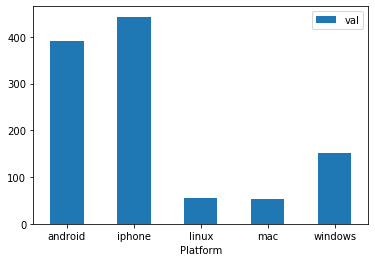

In [53]:
df = pd.DataFrame({'Platform':['android', 'iphone', 'linux','mac','windows'], 'val':[391, 443, 55, 52, 152]})
ax = df.plot.bar(x='Platform', y='val', rot=0)

In [54]:
buyclicks = pd.read_csv("C:/Data-Attraper le flamand rose/buy-clicks.csv")

In [55]:
buyclicks

,timestamp,txId,userSessionId,team,userId,buyId,price
0,2016-05-26 15:36:54,6004,5820,9,1300,2,3.0
1,2016-05-26 15:36:54,6005,5775,35,868,4,10.0
2,2016-05-26 15:36:54,6006,5679,97,819,5,20.0
3,2016-05-26 16:36:54,6067,5665,18,121,2,3.0
4,2016-05-26 17:06:54,6093,5709,11,2222,5,20.0
...,...,...,...,...,...,...,...
2942,2016-06-16 10:36:54,39838,34373,35,305,0,1.0
2943,2016-06-16 10:36:54,39839,37360,168,2016,1,2.0
2944,2016-06-16 10:36:54,39840,34542,64,68,2,3.0
2945,2016-06-16 10:36:54,39841,38277,27,667,4,10.0


In [56]:
df6=buyclicks.groupby('buyId').buyId.count()

In [57]:
df6

buyId
0    592
1    269
2    714
3    337
4    425
5    610
Name: buyId, dtype: int64

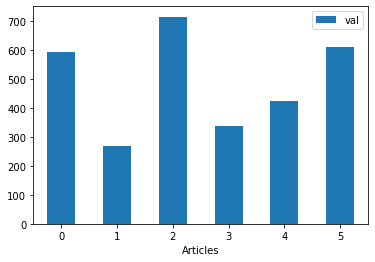

In [58]:
df = pd.DataFrame({'Articles':['0', '1', '2','3','4','5'], 'val':[592, 269, 714, 337, 425, 610]})
ax = df.plot.bar(x='Articles', y='val', rot=0)

In [59]:
df1 = pd.read_csv("C:/Data-Attraper le flamand rose/ad-clicks.csv")

In [60]:
df1

,timestamp,txId,userSessionId,teamId,userId,adId,adCategory
0,2016-05-26 15:13:22,5974,5809,27,611,2,electronics
1,2016-05-26 15:17:24,5976,5705,18,1874,21,movies
2,2016-05-26 15:22:52,5978,5791,53,2139,25,computers
3,2016-05-26 15:22:57,5973,5756,63,212,10,fashion
4,2016-05-26 15:22:58,5980,5920,9,1027,20,clothing
...,...,...,...,...,...,...,...
16318,2016-06-16 11:04:02,39800,34697,82,1214,16,clothing
16319,2016-06-16 11:04:05,39807,34673,77,751,23,fashion
16320,2016-06-16 11:04:12,39832,34262,18,1328,11,games
16321,2016-06-16 11:04:33,39794,34287,22,415,15,sports


In [61]:
df7=df1.groupby('adCategory').adCategory.count()

In [62]:
df7

adCategory
automotive      566
clothing       2340
computers      2638
electronics    1097
fashion        1727
games          2601
hardware       1588
movies         1692
sports         2074
Name: adCategory, dtype: int64

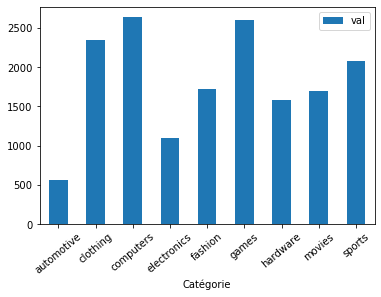

In [66]:
df = pd.DataFrame({'Catégorie':['automotive', 'clothing', 'computers','electronics','fashion','games','hardware','movies','sports'], 'val':[566, 2340, 2638, 1097, 1727, 2601,1588,1692,2074]})
ax = df.plot.bar(x='Catégorie', y='val', rot=40)

In [69]:
buyclicks = pd.read_csv("C:/Data-Attraper le flamand rose/buy-clicks.csv")

In [70]:
df7=buyclicks.groupby('buyId').price.sum()

In [71]:
df7

buyId
0      592.0
1      538.0
2     2142.0
3     1685.0
4     4250.0
5    12200.0
Name: price, dtype: float64

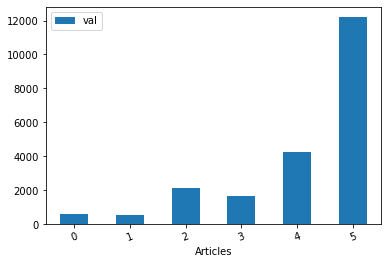

In [73]:
df = pd.DataFrame({'Articles':['0', '1', '2','3','4','5'], 'val':[592, 538, 2142, 1685, 4250, 12200]})
ax = df.plot.bar(x='Articles', y='val', rot=20)

In [74]:
buyclicks

,timestamp,txId,userSessionId,team,userId,buyId,price
0,2016-05-26 15:36:54,6004,5820,9,1300,2,3.0
1,2016-05-26 15:36:54,6005,5775,35,868,4,10.0
2,2016-05-26 15:36:54,6006,5679,97,819,5,20.0
3,2016-05-26 16:36:54,6067,5665,18,121,2,3.0
4,2016-05-26 17:06:54,6093,5709,11,2222,5,20.0
...,...,...,...,...,...,...,...
2942,2016-06-16 10:36:54,39838,34373,35,305,0,1.0
2943,2016-06-16 10:36:54,39839,37360,168,2016,1,2.0
2944,2016-06-16 10:36:54,39840,34542,64,68,2,3.0
2945,2016-06-16 10:36:54,39841,38277,27,667,4,10.0


In [97]:
df9=buyclicks.groupby('userId').price.sum().reset_index()

In [95]:
df9

20628.0

In [103]:
df9.sort_values('price', ascending=False).head(10)


,userId,price
504,2229,223.0
4,12,215.0
107,471,202.0
115,511,200.0
227,1027,189.0
282,1260,183.0
141,670,183.0
72,352,180.0
395,1732,172.0
387,1697,172.0


In [5]:
combineddata = pd.read_csv("C:/Data-Attraper le flamand rose/combined-data.csv")

In [6]:
print('Echantillons avec achats : ' + str(combineddata['avg_price'].count()) + ' du total echantillons : ' + str(combineddata['userId'].count())) 


Echantillons avec achats : 1411 du total echantillons : 4619


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001625DBE13C8>]],
      dtype=object)

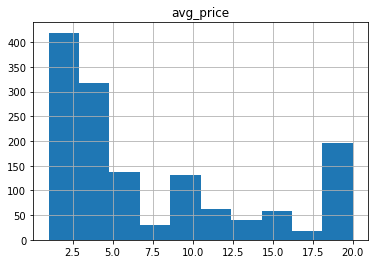

In [7]:
from matplotlib import pyplot
pd.DataFrame.hist(combineddata[['avg_price']])

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd 
import seaborn as sns

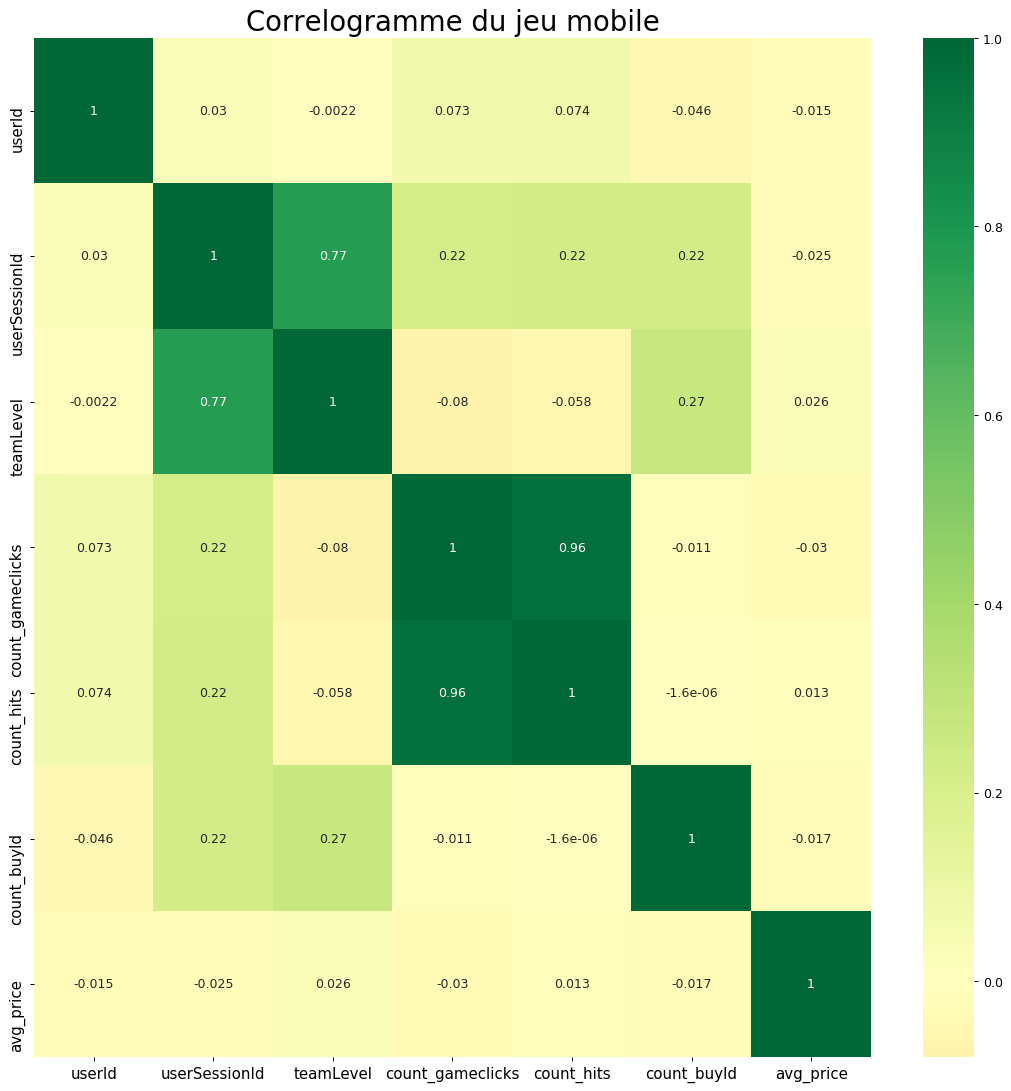

In [15]:
plt.figure(figsize=(15,15), dpi= 90)
sns.heatmap(combineddata.corr(), xticklabels=combineddata.corr().columns, yticklabels=combineddata.corr().columns, cmap='RdYlGn', center=0, annot=True)

#Présentation 
plt.title('Correlogramme du jeu mobile', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [16]:
correlation = combineddata.corr()
correlation

,userId,userSessionId,teamLevel,count_gameclicks,count_hits,count_buyId,avg_price
userId,1.000000,0.030163,-0.002158,0.072707,0.073603,-0.045570,-0.015360
userSessionId,0.030163,1.000000,0.765534,0.216295,0.221440,0.219281,-0.024990
teamLevel,-0.002158,0.765534,1.000000,-0.080415,-0.058090,0.270753,0.025648
count_gameclicks,0.072707,0.216295,-0.080415,1.000000,0.959317,-0.010759,-0.030101
count_hits,0.073603,0.221440,-0.058090,0.959317,1.000000,-0.000002,0.013463
count_buyId,-0.045570,0.219281,0.270753,-0.010759,-0.000002,1.000000,-0.017451
avg_price,-0.015360,-0.024990,0.025648,-0.030101,0.013463,-0.017451,1.000000


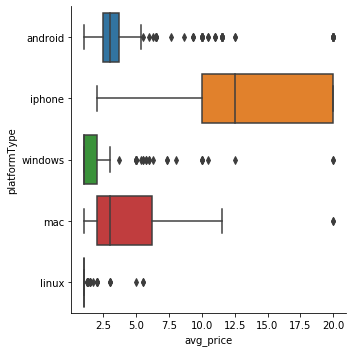

In [19]:
sns.catplot(x="avg_price",y="platformType",kind='box',data=combineddata)